In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [162]:
dataset = pd.read_csv('../Resources/diagnosis-of-covid-19-and-its-clinical-spectrum.csv')
dataset.tail()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
5639,ae66feb9e4dc3a0,3,positive,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,positive,f,f,f,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
dataset_new = dataset[["patient_id","patient_age_quantile","sars_cov_2_exam_result","hematocrit","hemoglobin","platelets","mean_platelet_volume","red_blood_cells","lymphocytes","mean_corpuscular_hemoglobin_concentration_mchc","leukocytes","basophils","mean_corpuscular_hemoglobin_mch","eosinophils","mean_corpuscular_volume_mcv","monocytes","red_blood_cell_distribution_width_rdw","serum_glucose"]].copy()
dataset_new.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose
0,44477f75e8169d2,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648
2,a46b4402a0e5696,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
print(len(dataset_new.index))

5644


In [165]:
list_X = ["patient_age_quantile","hematocrit","hemoglobin","platelets","mean_platelet_volume","red_blood_cells","lymphocytes","mean_corpuscular_hemoglobin_concentration_mchc","leukocytes","basophils","mean_corpuscular_hemoglobin_mch","eosinophils","mean_corpuscular_volume_mcv","monocytes","red_blood_cell_distribution_width_rdw","serum_glucose"]

In [166]:
X = dataset_new[list_X].values
y = dataset_new["sars_cov_2_exam_result"].values
print(X)

[[13.                 nan         nan ...         nan         nan
          nan]
 [17.          0.23651545 -0.02234027 ...  0.35754666 -0.62507266
  -0.14064808]
 [ 8.                 nan         nan ...         nan         nan
          nan]
 ...
 [ 4.                 nan         nan ...         nan         nan
          nan]
 [10.                 nan         nan ...         nan         nan
          nan]
 [19.          0.69428688  0.54156393 ...  0.5676524  -0.18279028
          nan]]


In [167]:
print(y)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'positive']


In [168]:

print(len(list_X))

16


In [169]:
#taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:len(list_X)])
X[:, 1:len(list_X)] = imputer.transform(X[:, 1:len(list_X)])

In [170]:
print(X)

[[ 1.30000000e+01 -2.18621415e-09 -1.60131883e-08 ... -3.22011376e-09
   1.02043253e-08  7.06999220e-09]
 [ 1.70000000e+01  2.36515447e-01 -2.23402679e-02 ...  3.57546657e-01
  -6.25072658e-01 -1.40648082e-01]
 [ 8.00000000e+00 -2.18621415e-09 -1.60131883e-08 ... -3.22011376e-09
   1.02043253e-08  7.06999220e-09]
 ...
 [ 4.00000000e+00 -2.18621415e-09 -1.60131883e-08 ... -3.22011376e-09
   1.02043253e-08  7.06999220e-09]
 [ 1.00000000e+01 -2.18621415e-09 -1.60131883e-08 ... -3.22011376e-09
   1.02043253e-08  7.06999220e-09]
 [ 1.90000000e+01  6.94286883e-01  5.41563928e-01 ...  5.67652404e-01
  -1.82790279e-01  7.06999220e-09]]


In [171]:
#encoding variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 1]


In [172]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)

In [116]:
#Scale the data using the MinMaxScaler
#from sklearn.preprocessing import StandardScaler
#X_scaler = StandardScaler().fit(X_train)

In [117]:
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [175]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [176]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9129859825443004
Testing Data Score: 0.9066022544283414


In [177]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.09339774557165861, R2: 0.9066022544283414


In [178]:
predictions = model.predict(X_test)

prediction_actual = {
    'Actual': y_test,
    'Prediction': predictions
}

df = pd.DataFrame(prediction_actual)
df = df.set_index('Actual').reset_index()
df.head(100)

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,0,0
98,0,0


In [179]:
# list of all the X columns
feature_names = list_X
print(feature_names)

['patient_age_quantile', 'hematocrit', 'hemoglobin', 'platelets', 'mean_platelet_volume', 'red_blood_cells', 'lymphocytes', 'mean_corpuscular_hemoglobin_concentration_mchc', 'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_mch', 'eosinophils', 'mean_corpuscular_volume_mcv', 'monocytes', 'red_blood_cell_distribution_width_rdw', 'serum_glucose']


In [180]:
# Determine which features should to be kept
preSelected_features = sorted(zip(model.feature_importances_, feature_names), reverse=True)
ranked_features = pd.DataFrame(preSelected_features, columns=['Score', 'Feature'])
ranked_features = ranked_features.set_index('Feature')
ranked_features

,Score
Feature,
patient_age_quantile,0.218641
leukocytes,0.143648
platelets,0.087240
monocytes,0.076894
lymphocytes,0.053394
hematocrit,0.053222
eosinophils,0.053145
red_blood_cells,0.047139
hemoglobin,0.039728


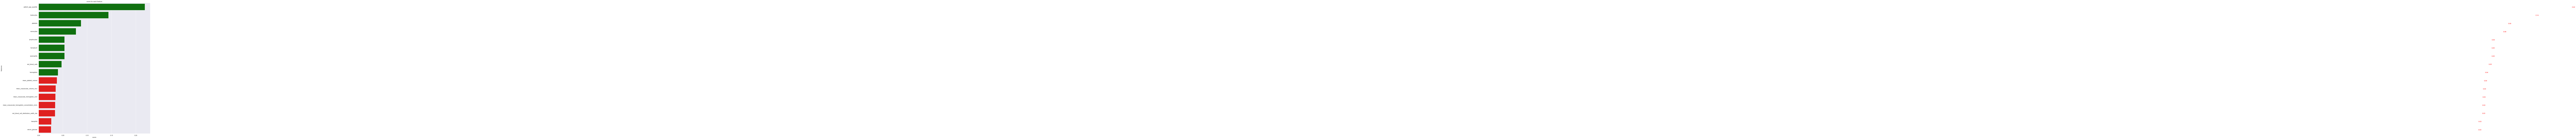

In [181]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 18))

sns.set(style="darkgrid")
sns.set_color_codes("muted")
# Create list of colors based on a condition 
colors = ['red' if (x < 0.039) else 'green' for x in ranked_features['Score']]


# Create barplot 
ax = sns.barplot(data=ranked_features.transpose(), palette=colors, orient='h')

plt.title('score for each feature')
# Set x-axis label
plt.xlabel('score')
# Set y-axis label
plt.ylabel('features')


#ax.fig.set_size_inches(15,15)
# Annotate every single Bar with its value, based on it's width  
for p in ax.patches:
    width = p.get_width()
    if width < 20:
        clr = 'red'
    else:
        clr = 'green'
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),color=clr,
             ha='center', va='center')
    
plt.savefig('plots/scorevsfeature_bloottest.png')

In [182]:
# Remove features with score < 0.039
selected_features = ['patient_age_quantile', 'leukocytes', 'platelets', 'monocytes', 'hematocrit', 'eosinophils', 'red_blood_cells', 'lymphocytes', 'hemoglobin', 'mean_platelet_volume']
#for tup in preSelected_features:
   # if tup[0] > 0.039:
       # selected_features.append(tup[1])
#print(selected_features)        

In [91]:
with open("selected_features.txt", "w") as output:
    output.write(str(selected_features))

In [183]:
# Use new data for all subsequent models
# Assign new data to X 

X2 = dataset_new[selected_features].values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X2[:, 1:len(selected_features)])
X2[:, 1:len(selected_features)] = imputer.transform(X2[:, 1:len(selected_features)])
#print(X2)
# split data into training and testing
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=42)
#X2_scaler = StandardScaler().fit(X2_train)
#X2_train_scaled = X2_scaler.transform(X2_train)
#X2_test_scaled = X2_scaler.transform(X2_test)


In [184]:
print(X2_train)

[[ 1.60000000e+01  6.21583276e-09 -3.53500284e-10 ... -7.86673635e-09
  -1.60131883e-08  7.43814261e-09]
 [ 1.60000000e+01 -2.14270368e-01  9.02071476e-01 ...  8.98340821e-01
  -3.98275822e-01  1.91796112e+00]
 [ 1.00000000e+00  6.21583276e-09 -3.53500284e-10 ... -7.86673635e-09
  -1.60131883e-08  7.43814261e-09]
 ...
 [ 1.60000000e+01 -1.27173138e+00 -1.27112162e+00 ... -3.13251093e-02
  -2.10307747e-01 -3.25903296e-01]
 [ 8.00000000e+00  6.21583276e-09 -3.53500284e-10 ... -7.86673635e-09
  -1.60131883e-08  7.43814261e-09]
 [ 4.00000000e+00  6.21583276e-09 -3.53500284e-10 ... -7.86673635e-09
  -1.60131883e-08  7.43814261e-09]]


In [185]:
print(X2_test)

[[ 1.70000000e+01  6.21583276e-09 -3.53500284e-10 ... -7.86673635e-09
  -1.60131883e-08  7.43814261e-09]
 [ 1.40000000e+01  6.21583276e-09 -3.53500284e-10 ... -7.86673635e-09
  -1.60131883e-08  7.43814261e-09]
 [ 8.00000000e+00  6.21583276e-09 -3.53500284e-10 ... -7.86673635e-09
  -1.60131883e-08  7.43814261e-09]
 ...
 [ 1.60000000e+01  6.21583276e-09 -3.53500284e-10 ... -7.86673635e-09
  -1.60131883e-08  7.43814261e-09]
 [ 6.00000000e+00  6.21583276e-09 -3.53500284e-10 ... -7.86673635e-09
  -1.60131883e-08  7.43814261e-09]
 [ 9.00000000e+00  6.21583276e-09 -3.53500284e-10 ... -7.86673635e-09
  -1.60131883e-08  7.43814261e-09]]


In [186]:
print(X2.shape)

(5644, 10)


In [187]:
columns = ['patient_age_quantile', 'leukocytes', 'platelets', 'monocytes', 'hematocrit', 'eosinophils', 'red_blood_cells', 'hemoglobin', 'lymphocytes', 'mean_platelet_volume']

# converting numpy array to pandas
df_X2 = pd.DataFrame(data=X2[0:,0:], index=X2[0:,0],columns=columns)  
print(len(df_X2))
print(df_X2.iloc[5000])

5644
patient_age_quantile    1.900000e+01
leukocytes              6.215833e-09
platelets              -3.535003e-10
monocytes              -3.220114e-09
hematocrit             -2.186214e-09
eosinophils             7.206147e-09
red_blood_cells         8.424447e-09
hemoglobin             -7.866736e-09
lymphocytes            -1.601319e-08
mean_platelet_volume    7.438143e-09
Name: 19.0, dtype: float64


In [188]:
# Train new model
model2 = RandomForestClassifier(n_estimators=200)
model2.fit(X2_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
print(f"Training Data Score: {model2.score(X2_train, y_train)}")
print(f"Testing Data Score: {model2.score(X2_test, y_test)}")

Training Data Score: 0.9135364989369241
Testing Data Score: 0.9092841956059532


In [191]:
predictions_1 = model2.predict(X2_test)
MSE_1 = mean_squared_error(y_test, predictions_1)
r2_1 = model2.score(X2_test, y_test)

print(f"MSE: {MSE_1}, R2: {r2_1}")

MSE: 0.09071580439404678, R2: 0.9092841956059532


In [192]:
# Create the RandomSearchCV model
from sklearn.model_selection import GridSearchCV
model3 = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 600, 1200, 1400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [14, 15, 16, 17, 18, None]
}
grid = GridSearchCV(model3, param_grid, cv=5, verbose=3, n_jobs=-1)

# Train the model with GridSearch
grid.fit(X2_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [193]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 17, 'max_features': 'auto', 'n_estimators': 200}
0.9003073006941479


In [194]:
# Tuned parameters
max_features = grid.best_params_['max_features']
n_estimators = grid.best_params_['n_estimators']
max_depth = grid.best_params_['max_depth']
criterion = 'entropy'

# Tuned model
tuned_model = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators, 
                                     criterion=criterion, max_depth=max_depth, random_state=42)
tuned_model.fit(X2_train, y_train)
model_3_training_score = round(tuned_model.score(X2_train, y_train)*100,3)
tuned_accuracy = round(tuned_model.score(X2_test, y_test)*100,3)

print(f"Training Data Score: {model_3_training_score} %")
print(f"Testing Data Score: {tuned_accuracy} %")

Training Data Score: 91.354 %
Testing Data Score: 90.999 %


In [195]:
predictions_2 = tuned_model.predict(X2_test)

prediction_actual_2 = {
    'Actual': y_test,
    'Prediction': predictions_2
}

df2 = pd.DataFrame(prediction_actual_2)
df2 = df2.set_index('Actual').reset_index()
df2.head(100)

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,0,0
98,0,0


In [196]:
df2_positive_prediction = df2[df2['Prediction'] == 1]
df2_positive_prediction.head()

,Actual,Prediction
90,1,1
400,1,1
417,1,1
474,0,1
579,1,1


In [197]:
print(len(df2_positive_prediction))

12


In [198]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, predictions_2)
tn, fp, fn, tp = confusion_matrix(y_test, predictions_2).ravel()

In [199]:
print ('Confusion Matrix :')
print(cm) 
print(tn, fp, fn, tp) 
print ('Accuracy Score :',accuracy_score(y_test, predictions_2) )
print ('Report : ')
print (classification_report(y_test, predictions_2) )

Confusion Matrix :
[[1276    4]
 [ 123    8]]
1276 4 123 8
Accuracy Score : 0.9099929128277817
Report : 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1280
           1       0.67      0.06      0.11       131

    accuracy                           0.91      1411
   macro avg       0.79      0.53      0.53      1411
weighted avg       0.89      0.91      0.87      1411



In [200]:
from confusion_matrix import perf_measure

perf_measure(y_test,predictions_2)

(0.061068702290076333,
 0.996875,
 0.6666666666666666,
 0.9120800571837027,
 8,
 4,
 1276,
 123)

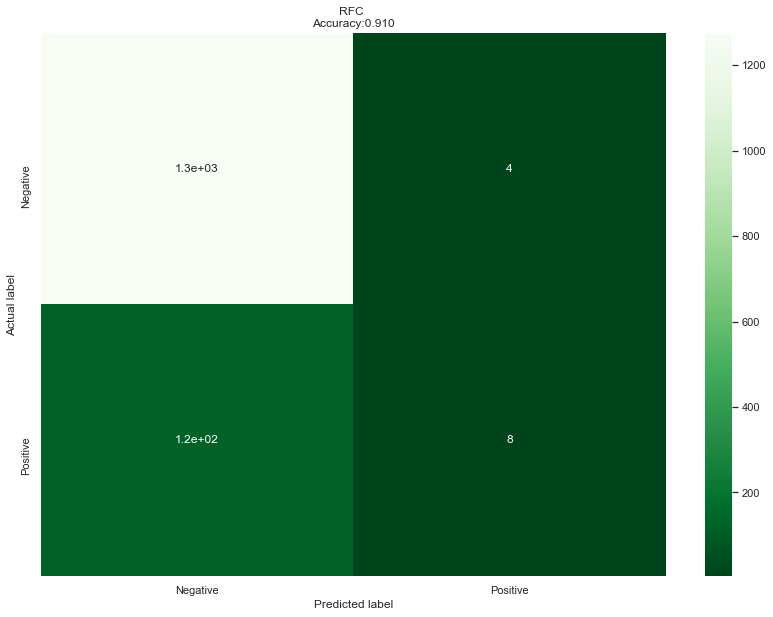

In [201]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_cm(y_test,y_pred,labels):
    # Creates a confusion matrix
    cm = confusion_matrix(y_test, y_pred) # for the tuned model

    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                        index = labels, 
                        columns = labels)


    plt.figure(figsize=(14,10))  
    sns.heatmap(cm_df, annot=True, cmap = "Greens_r")
    plt.title('RFC \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.savefig('plots/cm_heatmap_bloottest.png')
    plt.show()

plot_cm(y_test, predictions_2, ['Negative','Positive'])


In [202]:
#saving the model
# you can you import cPickle as well to save the model
from sklearn.externals import joblib

# Save the trained model to a file 
joblib.dump(tuned_model, 'bloottest_RFC_selected_features_unscaled.pkl')


['bloottest_RFC_selected_features_unscaled.pkl']

In [203]:
#loading the model
from sklearn.externals import joblib
model_RFC = joblib.load('bloottest_RFC_selected_features_unscaled.pkl')

In [ ]:
#-1.288428, -0.906829, 0.567652, 0.694287, -0.835508, 0.578024, 0.541564, -0.295726, -0.325903

In [204]:
#prediction
print(model_RFC.predict([[ 19, -1.288428, -0.906829, 0.567652, 0.694287, -0.835508, 0.578024, 0.541564, -0.295726, -0.325903]]))

[1]
